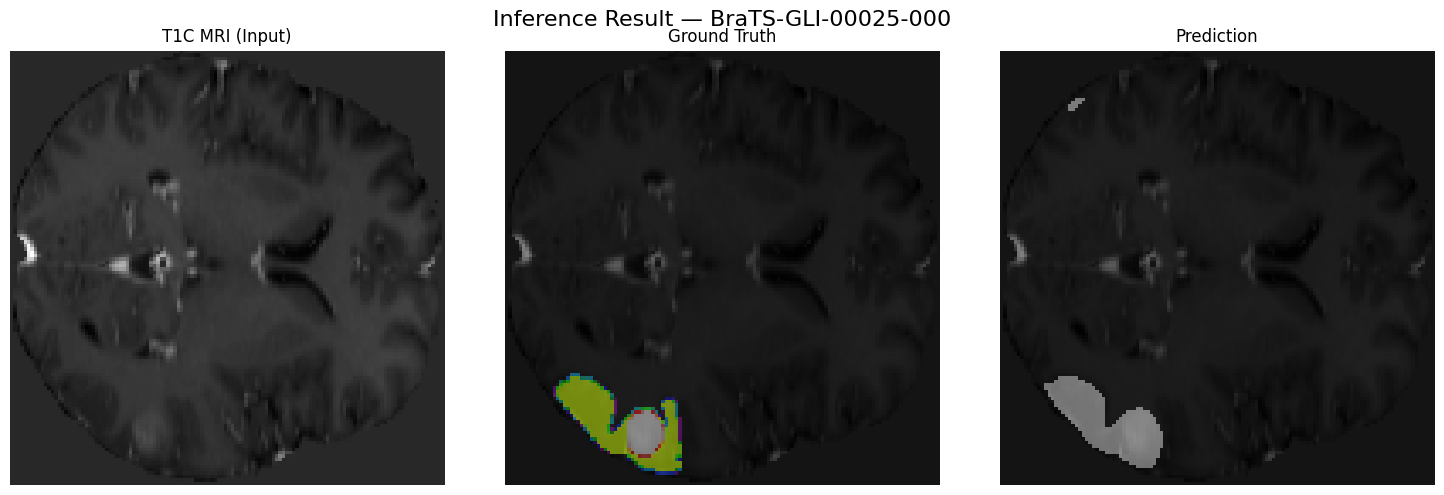

In [1]:
# 🧠 Inference Visualization (Using T1C)

import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# Paths
patient_id = "BraTS-GLI-00025-000"
processed_dir = r"F:\Projects\ML_Models\BrainTome\data\processed"
inference_dir = r"F:\Projects\ML_Models\BrainTome\results\inference"


# Use T1C instead of FLAIR
t1c_path = os.path.join(processed_dir, patient_id, f"{patient_id}-t1c_resized.nii.gz")
gt_path = os.path.join(processed_dir, patient_id, f"{patient_id}-seg_resized.nii.gz")
pred_path = os.path.join(inference_dir, f"{patient_id}_pred.nii.gz")

# Load data
t1c = nib.load(t1c_path).get_fdata()
gt = nib.load(gt_path).get_fdata()
pred = nib.load(pred_path).get_fdata()

# Choose middle slice
slice_idx = t1c.shape[2] // 2

# Plot
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(t1c[:, :, slice_idx], cmap='gray')
axs[0].set_title("T1C MRI (Input)")
axs[0].axis('off')

axs[1].imshow(t1c[:, :, slice_idx], cmap='gray')
axs[1].imshow(gt[:, :, slice_idx], cmap='nipy_spectral', alpha=0.5)
axs[1].set_title("Ground Truth")
axs[1].axis('off')

axs[2].imshow(t1c[:, :, slice_idx], cmap='gray')
axs[2].imshow(pred[:, :, slice_idx], cmap='nipy_spectral', alpha=0.5)
axs[2].set_title("Prediction")
axs[2].axis('off')

plt.suptitle(f"Inference Result — {patient_id}", fontsize=16)
plt.tight_layout()
plt.show()
